In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

In [2]:
df = pd.read_csv("/content/weather.csv")
# df.columns=["Outlook","Temp","Humidity","Windy","Play"]
#print(df)
# outlook_dat = pd.get_dummies("Outlook")
# temp_dat = pd.get_dummies("Temp")
# humid_dat = pd.get_dummies("Humidity")
# df.drop("Outlook",inplace=True,axis=1)
# df.drop("Temp",inplace=True,axis=1)
# df.drop("Humidity",inplace=True,axis=1)
# df=df.join(outlook_dat)
# df=df.join(temp_dat)
# df=df.join(humid_dat)
df_dummies=pd.get_dummies(df)
print(df_dummies)
ip_feats = df_dummies.drop("Play",axis=1)
op_feat=df_dummies["Play"]

    Windy  Play  Outlook_overcast  Outlook_rainy  Outlook_sunny  Temp_cool  \
0       0     0                 0              1              0          0   
1       1     0                 0              1              0          0   
2       0     1                 1              0              0          0   
3       0     1                 0              0              1          0   
4       0     1                 0              0              1          1   
5       1     0                 0              0              1          1   
6       1     1                 1              0              0          1   
7       0     0                 0              1              0          0   
8       0     1                 0              1              0          1   
9       0     1                 0              0              1          0   
10      1     1                 0              1              0          0   
11      1     1                 1              0              0 

In [3]:
print(op_feat)

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64


In [4]:
X_train,X_test,y_train,y_test = train_test_split(ip_feats,op_feat,test_size=0.3,random_state=42)


In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.4, 0.875, 'X[7] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

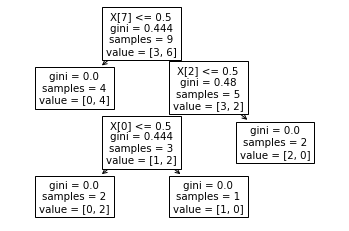

In [6]:
tree.plot_tree(clf)

In [7]:
predictions=clf.predict(X_test)

In [8]:
print(y_test)

9     1
11    1
0     0
12    1
5     0
Name: Play, dtype: int64


In [9]:
target_names = ['class 0', 'class 1',]
print(classification_report(y_test, predictions, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.50      0.50      0.50         2
     class 1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [30]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [ ]:
boston = datasets.load_boston()
x = pd.DataFrame(boston["data"])
x.columns = boston["feature_names"]
y = pd.DataFrame(boston["target"])

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
kernel = ['linear', 'rbf', 'poly']
kernel_performance = []
for i in kernel:
    c_score = []
    for c in range(1, 100):
        model = SVR(C=c)
        model.fit(x_train, y_train)
        c_score.append((c,model.score(x_test, y_test)))
    kernel_performance.append((i, max(c_score, key=lambda item: item[1])))
    print(kernel_performance)

In [ ]:
mall = pd.read_csv("/Content/Mall_customers.csv")
le = LabelEncoder()
mall["Gender"] = le.fit_transform(mall["Gender"])
mall.drop("CustomerID", axis=1, inplace=True)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(mall)
    wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()
km1=KMeans(n_clusters=5)
km1.fit(mall)
y=km1.predict(mall)
mall["label"] = y

In [ ]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = mall['Age']
mall['Age Groups'] = pd.cut(x=col, bins=intervals)
mall['Age Groups'] 
mall = pd.get_dummies(mall)
mall.drop(["Age"], axis=1, inplace=True)
pca = PCA(n_components=10)
mall = pca.fit_transform(mall)
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(mall)
y_pred = clustering_model.labels_
